# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import time
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import HuberRegressor, LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#create a logistic regression model and fit it to the churn data and classify the data based on "churn" column
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.utils import resample
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import set_config
set_config(display="diagram")
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import roc_auc_score,precision_recall_curve, roc_curve,confusion_matrix,accuracy_score,f1_score, recall_score, precision_score, ConfusionMatrixDisplay

import datetime

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

#### Basic Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Null Checks
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
###  Observation : No Null Values across the column set

In [8]:
df.shape
# 41188 rows and 21 columns with all non-null values across the board

(41188, 21)

In [9]:
unknown_counts = (df == "unknown").sum()
non_existant_counts=(df == "nonexistent").sum()
print(unknown_counts)
print(non_existant_counts)

# Apart from the column named "default" the "unknown" values are sparse across the dataset
# poutcome( Outcome of the previous marketing campaign) column has a majority of the values as "non existant" which makes it a potentially weak variable for analysis

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome          35563
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0


#### Basic Data Exploration Summary
1. The dataset has 41118 rows and 21 columns
2. None of the columns have any NULL values
3. That said , there are values like "unknown" and "non existant" that point to the lack of data points
4. The columns with majority pseudo null values are poutcome( Outcome of the previous marketing campaign) and column named "default"(Vale indicating if the person in defaulting on 'credit')

#### Categorical Column Analysis

In [10]:
categorical_cols = df.select_dtypes(include=['object'])
for col in categorical_cols.columns:
    print(f"Column: {col}")
    print("--------------------------------------")
    print("Distinct Value count for this column:")
    print(df[col].nunique())
    print("\n")
    print("Unique values and counts:")
    print(df[col].value_counts())
    print("\n")


Column: job
--------------------------------------
Distinct Value count for this column:
12


Unique values and counts:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


Column: marital
--------------------------------------
Distinct Value count for this column:
4


Unique values and counts:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


Column: education
--------------------------------------
Distinct Value count for this column:
8


Unique values and counts:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
ill

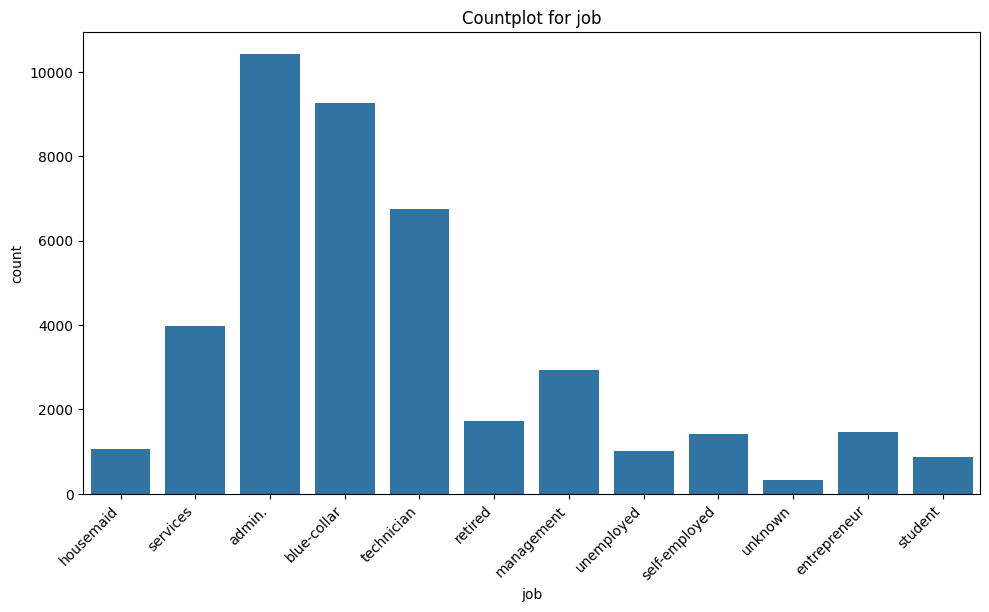

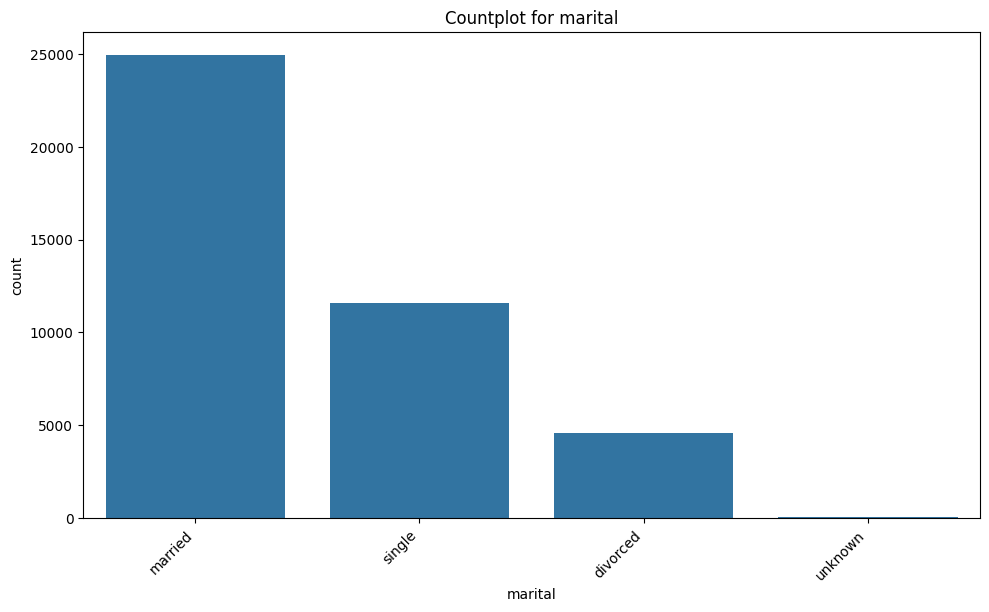

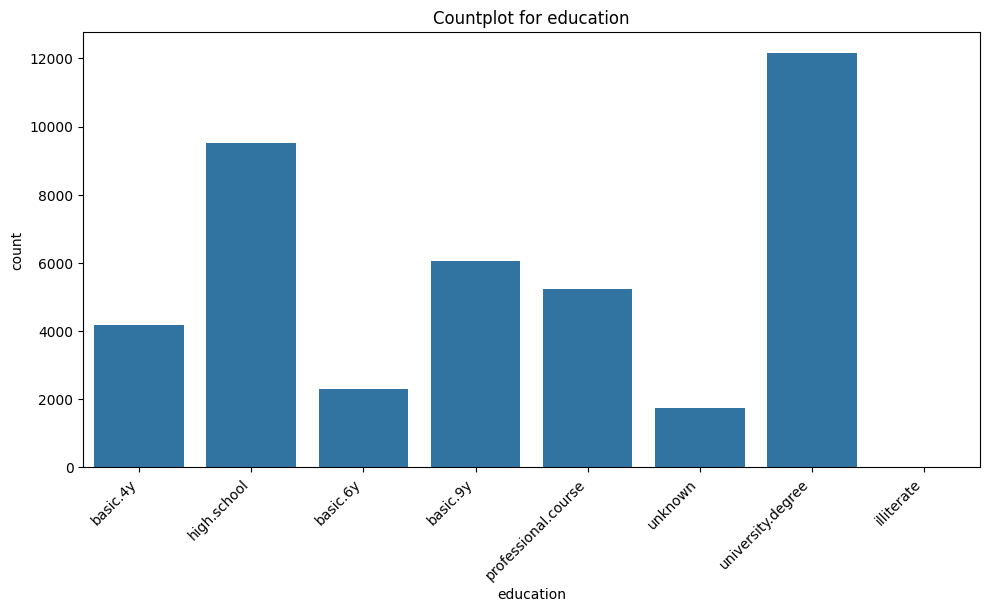

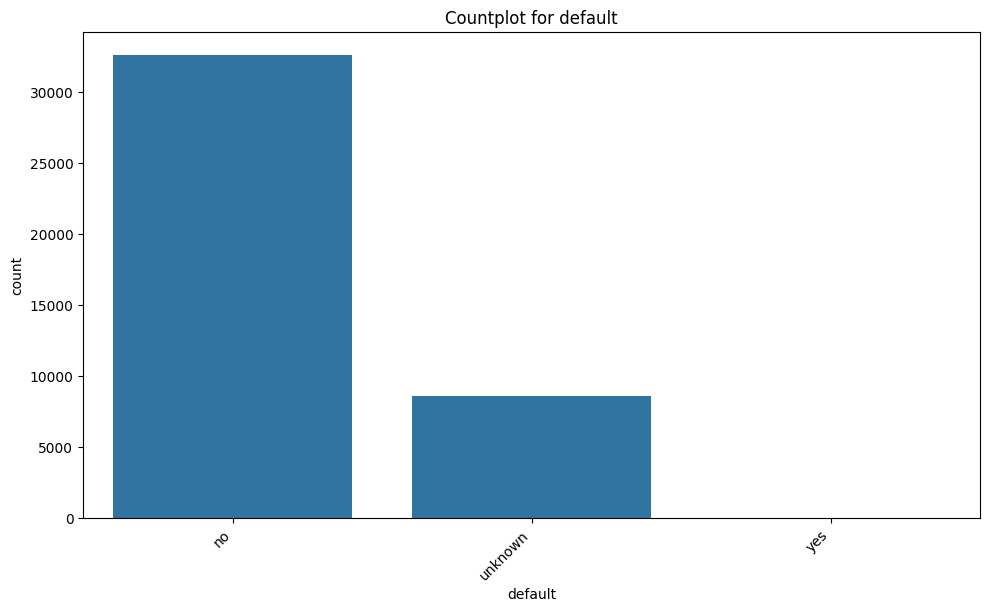

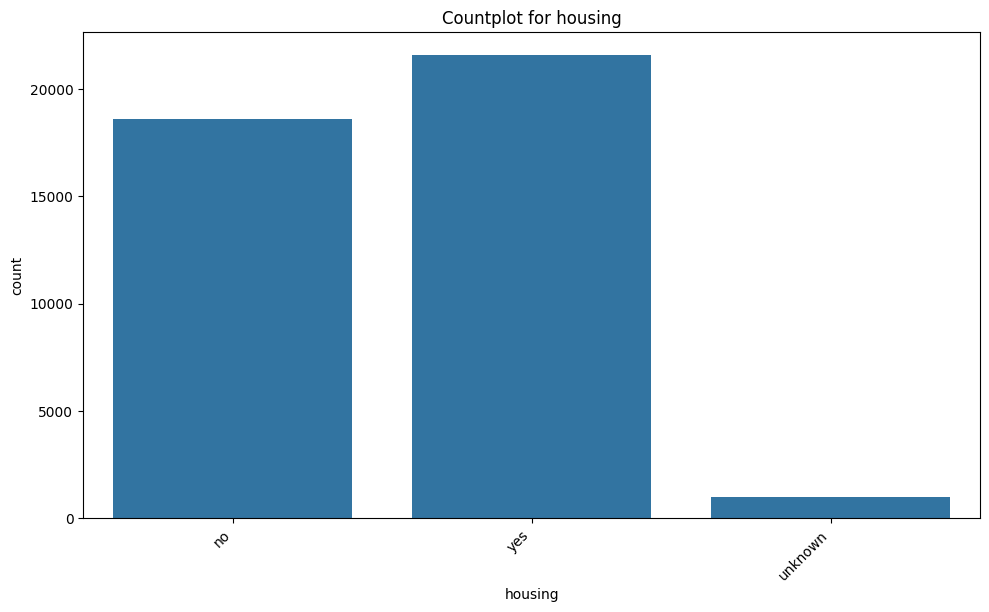

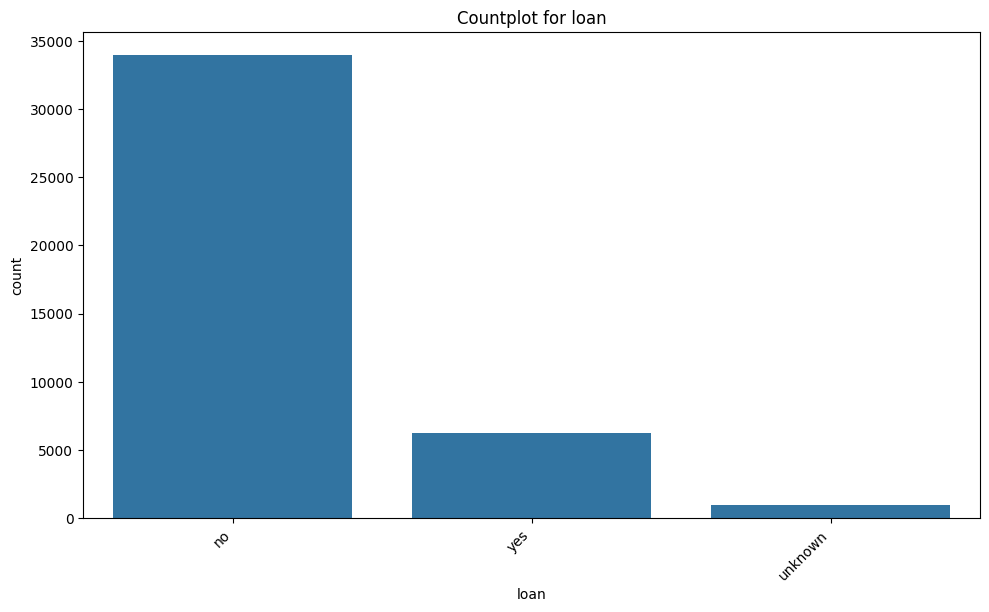

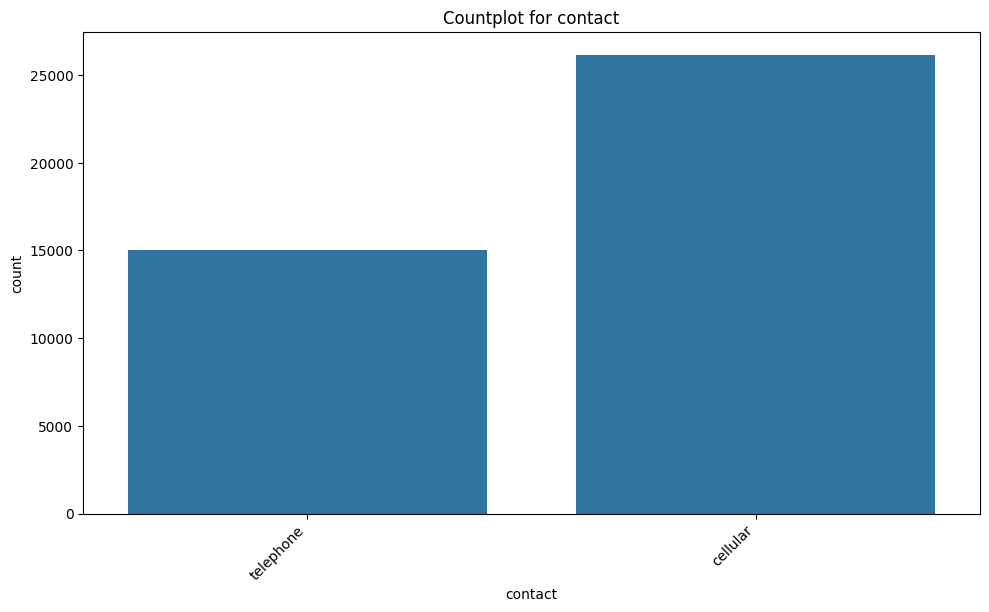

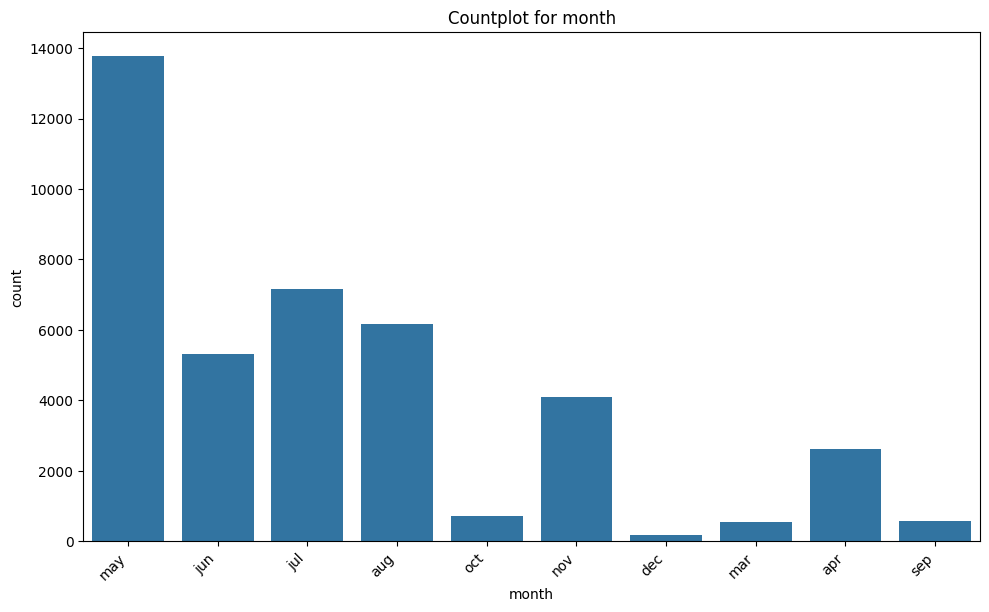

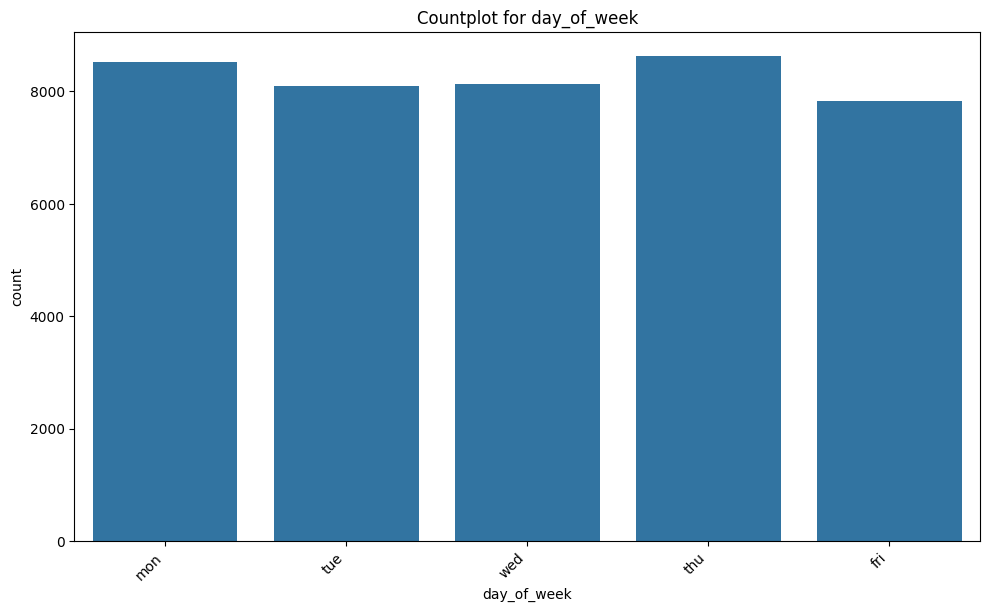

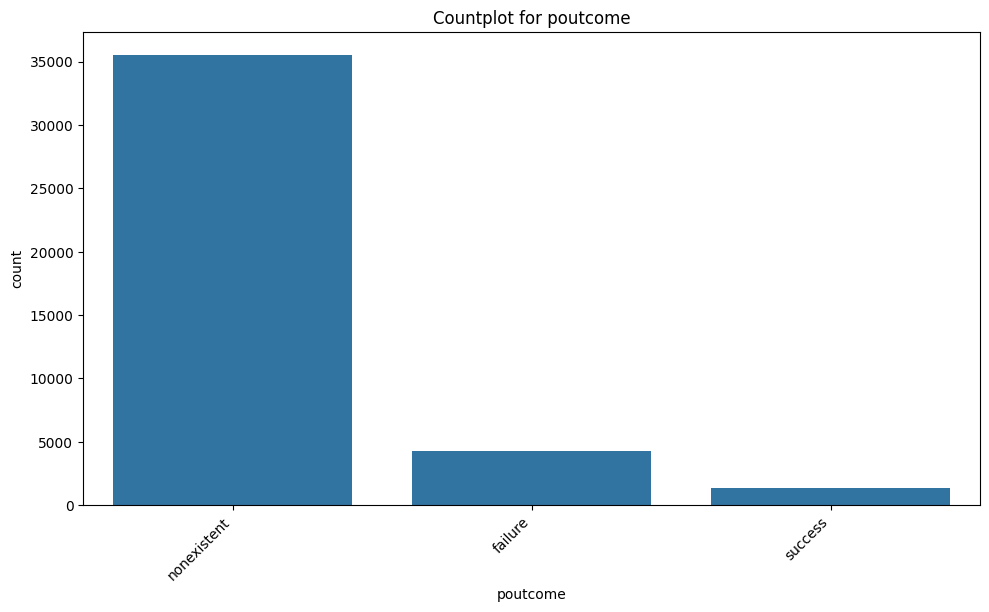

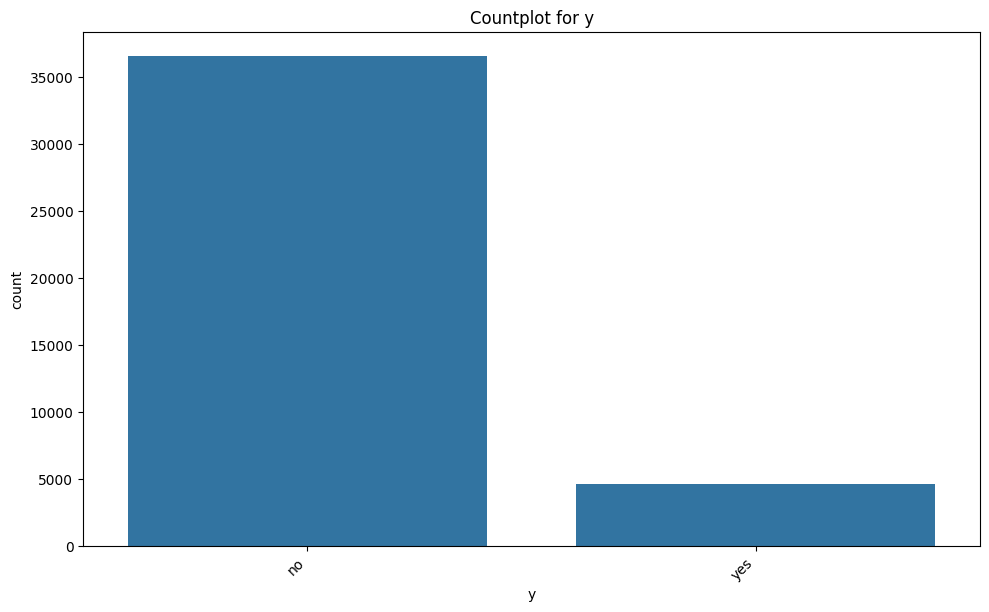

In [11]:
# Gra[hical depiction of the above categorical columns
for col in categorical_cols.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
    plt.tight_layout()  # Ensure labels fit within the figure area
    plt.title(f'Countplot for {col}')
    plt.show()


#### Categorical Column Observations/Summary
1. The dataset does not contain any data for the months of Jan and Feb. The numbers of records for the winter months of October to December is scant wrt the other months of spring and summer
2. The dataset has high occurence of people with college university degree in the education column vis-a-vis the rest of the values
3. The resultant column ( to be predicted) has a higher frequencies of "no" vis-a-vis "yes"
4. The loan column is also not balanced
5. No data for the weekend
6. The target column in a boolean/binary which makes this a classification problem at its core
7. The number of unique values for each of these categorical columns are not high . With month and job having 10 and 12 values respectively
8. The dataset is biased towards the cohort with no housing loan and no personal loans
9. Most of the people are contacted through cellular.
10. Most of the people are contacted for the first time.
11. The dataset largely consists of cohorts were not subscribed to the term deposit in the previous campaign.
### Conclusion: The data is overall imbalanced based on observations of various attributes as can be inferred from the above output

#### Numerical Data Analysis

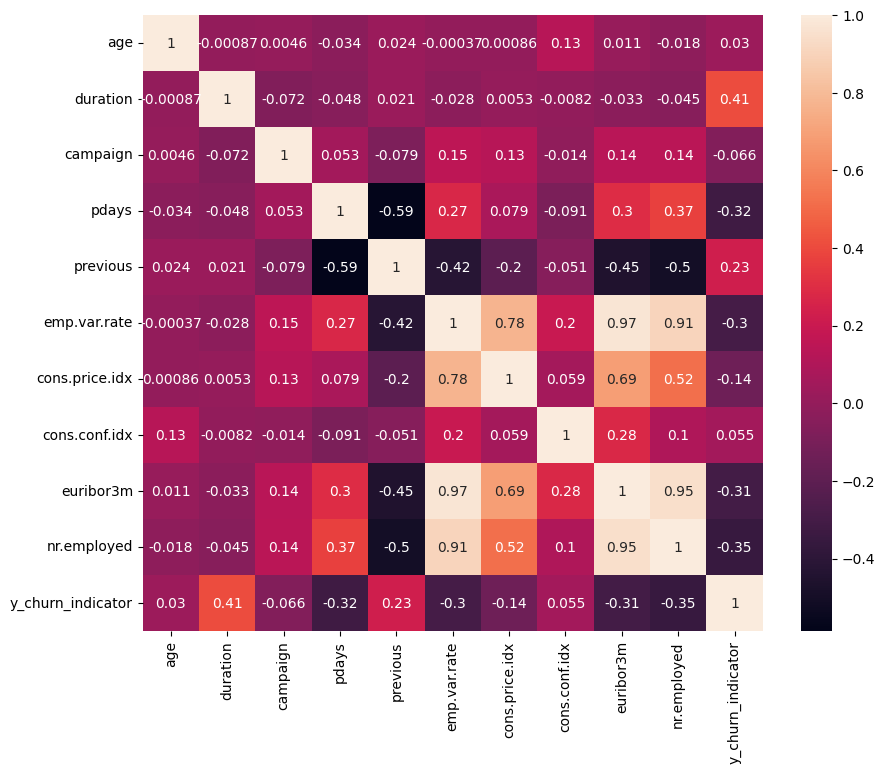

In [12]:
### Churn Indicator modelled as Boolean Yes and No
df2 = df
df2['y_churn_indicator'] = df2['y'].map({'yes': 1, 'no': 0})
non_numeric_columns = df2.select_dtypes(include=['object']).columns
# Copy non numeric columns in a separate dataframe to generate the heatmap for correlation across numerical variables
df2_numeric = df2.drop(non_numeric_columns, axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(df2_numeric.corr(), annot=True)
plt.show()


##### Heatmap does not indicate a string correlation between churn and any other attribute.
1. Reasonable positive correlation with previous and negative correlation with employed

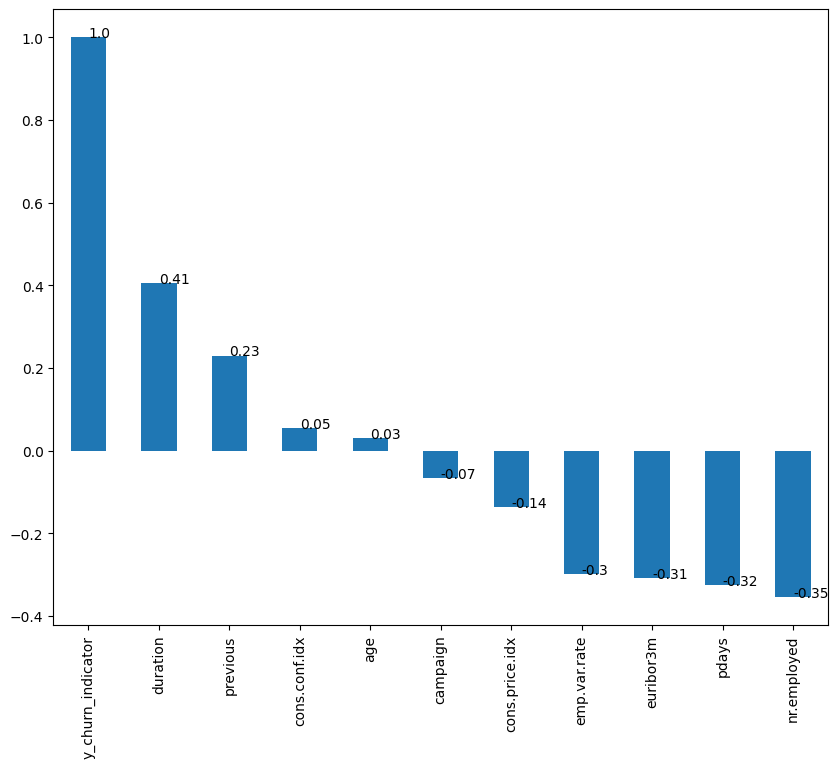

In [13]:
plt.figure(figsize=(10, 8))
df2_numeric.corr()['y_churn_indicator'].sort_values(ascending=False).plot(kind='bar')
# show the value on the bar
for i in range(len(df2_numeric.corr()['y_churn_indicator'].sort_values(ascending=False))):
    plt.text(i, df2_numeric.corr()['y_churn_indicator'].sort_values(ascending=False)[i], round(df2_numeric.corr()['y_churn_indicator'].sort_values(ascending=False)[i], 2))
    
plt.show()

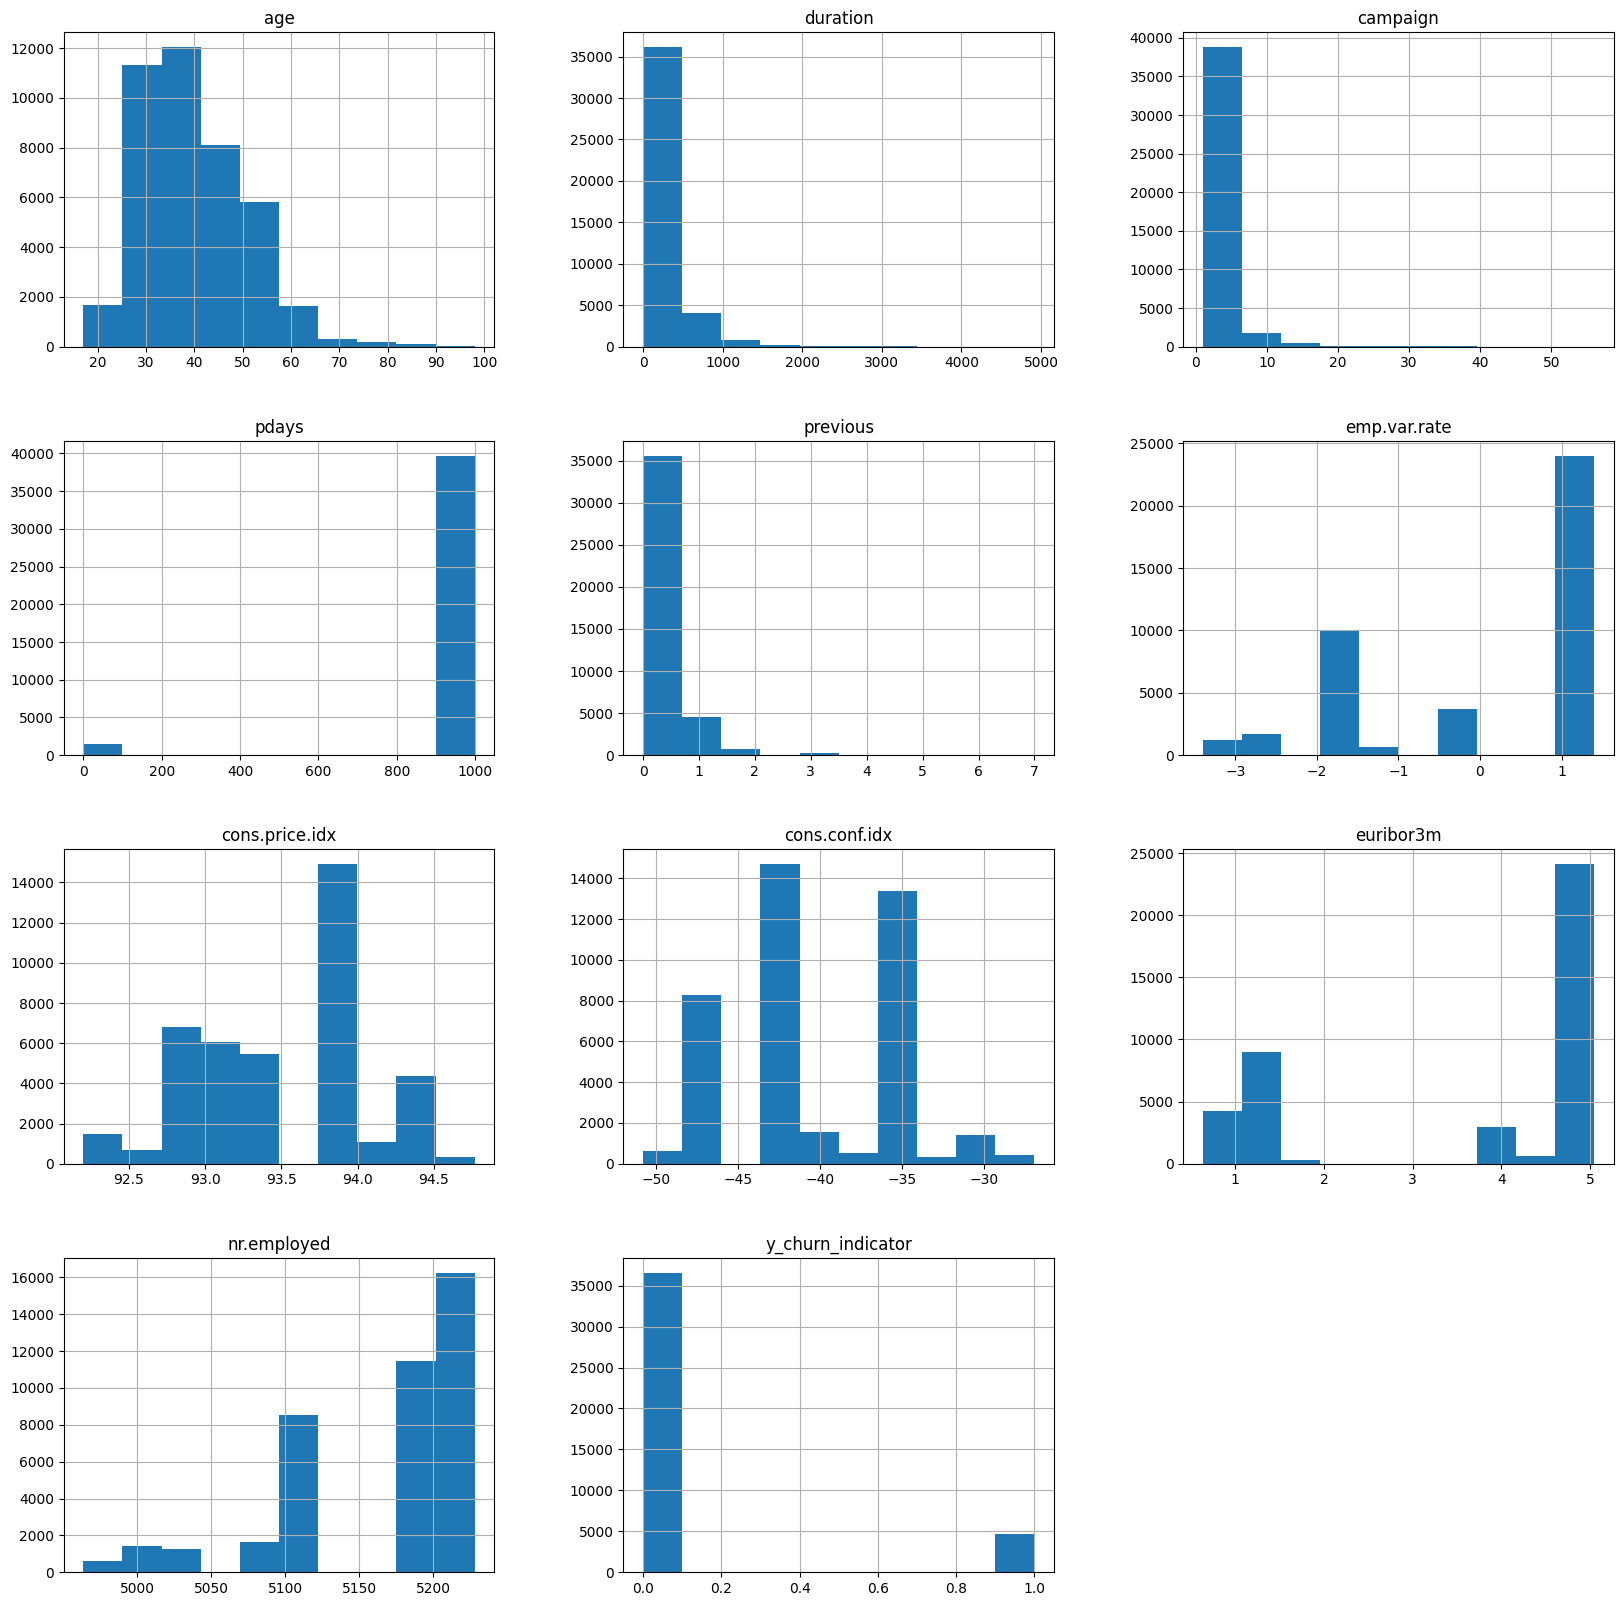

In [14]:
# show histograms for all columns to depict numeric columns distrubution
df2.hist(figsize=(20, 20))
plt.show()

#### Numerical Analysis Conclusion
The following columns have a significant impact on whether a client subscribes to a term deposit, with an influence between  0.23 and 0.35 on the target column:
1. Previous: Indicates the outcome of previous marketing campaigns.
2. Emp.var.rate: Represents the employment variation rate.
3. Euribor3m: Reflects the Euribor 3-month rate.
4. Pdays: Denotes the number of days since the last contact.
5. Nr.employed: Refers to the number of employees in the bank.

#### Impact on Subscription Chances:

###### Positive Factors:
Duration & Previous: The more successful previous marketing outcomes, the higher the likelihood of subscribing to a term deposit. The higher the duration of interactions the higher the possibility of subscription
   
###### Negative Factors:
Emp.var.rate, Euribor3m, Pdays, and Nr.employed: Higher values in these categories decrease the chances of subscribing

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [15]:
df2.drop('y_churn_indicator', axis=1, inplace=True)

In [16]:
# Apply One Hot encoding for the categorical columns and StandardScaler to numerical columns
ohe = OneHotEncoder(sparse_output=False,handle_unknown="infrequent_if_exist")
ss = StandardScaler()
ohe_cols = df2.select_dtypes(include = 'object').columns.drop('y')
ss_cols = df2.select_dtypes(exclude = 'object').columns
print(ohe_cols, ss_cols)
# Apply transformation
preprocessor = make_column_transformer((ohe, ohe_cols), (ss, ss_cols))

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object') Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [17]:
# Standard Split Train and test
df2['y'] = df2['y'].map({'no': 0, 'yes': 1})
X = df2.drop('y', axis=1)
y = df2['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Baseline Accuracy: 0.8875940762320952


Baseline Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10968
           1       0.00      0.00      0.00      1389

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357



Baseline Confusion Matrix:
[[10968     0]
 [ 1389     0]]


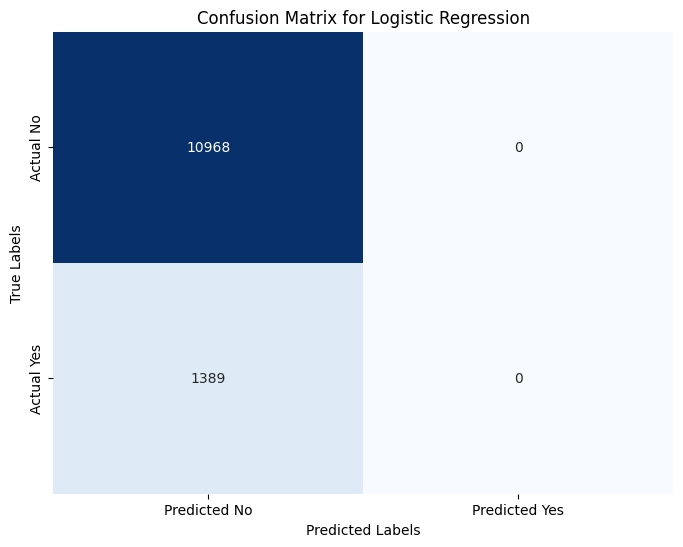

In [18]:
baseline_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy="most_frequent"))])
baseline_model = baseline_pipe.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)
# Calculate baseline metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Accuracy: {accuracy}")
print("\n")

# Print a classification report for more detailed metrics
print("Baseline Classification Report:")
print(classification_report(y_test, y_pred))
print("\n")


# Print a confusion matrix for visualizing true positives, false positives, etc.
print("Baseline Confusion Matrix:")
cm_baseline=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Conclusion
#### Accuracy
   The baseline accuracy is ~88.75 percent . 
#### Classification Report Interpretation
##### Class "no" Performance:
Precision: 0.89
Recall: 1.00
F1-score: 0.94
Support: 10,968
###### Interpretation
The model performs very well on the "no" class, with high precision and perfect recall. This means it correctly identifies almost all instances of the "no" class.

##### Class "yes" Performance:
Precision: 0.00
Recall: 0.00
F1-score: 0.00
Support: 1,389
###### Interpretation
The model fails to identify any instances of the "yes" class correctly, resulting in zero precision, recall, and F1-score. This indicates a severe imbalance in how the model handles the two classes.

##### Overall Metrics:
Accuracy: 0.89
Macro Average: Precision (0.44), Recall (0.50), F1-score (0.47)
Weighted Average: Precision (0.79), Recall (0.89), F1-score (0.83)

##### Interpretation and Conclusions
Class Imbalance: The dataset is heavily imbalanced, with the "no" class having about 7.9 times more instances than the "yes" class. This imbalance significantly affects the model's performance.

#### Uber Conclusion

Model Bias: The model is strongly biased towards predicting the "no" class. It correctly identifies nearly all "no" instances but fails to recognize any "yes" instances. This suggests that the model might be overfitting to the majority class or that the features are not informative enough for the minority class.


Similar conclusions from the Confusion Matrix


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Logistic Regression

In [19]:
lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state = 42))])
lr_model = lr_pipe.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


### Problem 9: Score the Model

What is the accuracy of your model?

Logistic regression Accuracy: 0.9120336651290767


Logistic regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.67      0.42      0.52      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357



Logistic Regression Confusion Matrix:
[[10683   285]
 [  802   587]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.67      0.42      0.52      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357



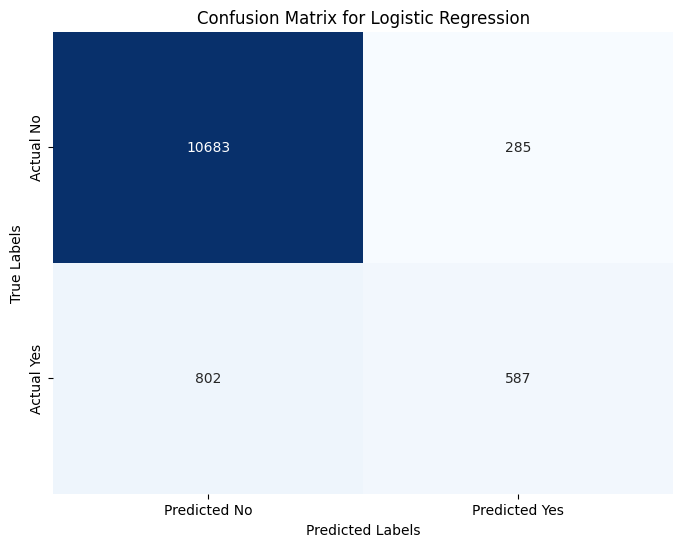

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic regression Accuracy: {accuracy}")
print("\n")

# Print a classification report for more detailed metrics
print("Logistic regression Classification Report:")
print(classification_report(y_test, y_pred))
print("\n")


# Print a confusion matrix for visualizing true positives, false positives, etc.
print("Logistic Regression Confusion Matrix:")
cm_logistic=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

                     Time Taken  Train Accuracy  Test Accuracy  Precision  \
Logistic Regression    0.540075        0.911554       0.912034   0.673165   
KNN                    0.086366        0.927266       0.901271   0.673165   
Decision Tree          0.333283        1.000000       0.889860   0.673165   
SVM                   19.749490        0.923312       0.912034   0.673165   

                       Recall  F1 Score  
Logistic Regression  0.422606  0.519239  
KNN                  0.422606  0.519239  
Decision Tree        0.422606  0.519239  
SVM                  0.422606  0.519239  


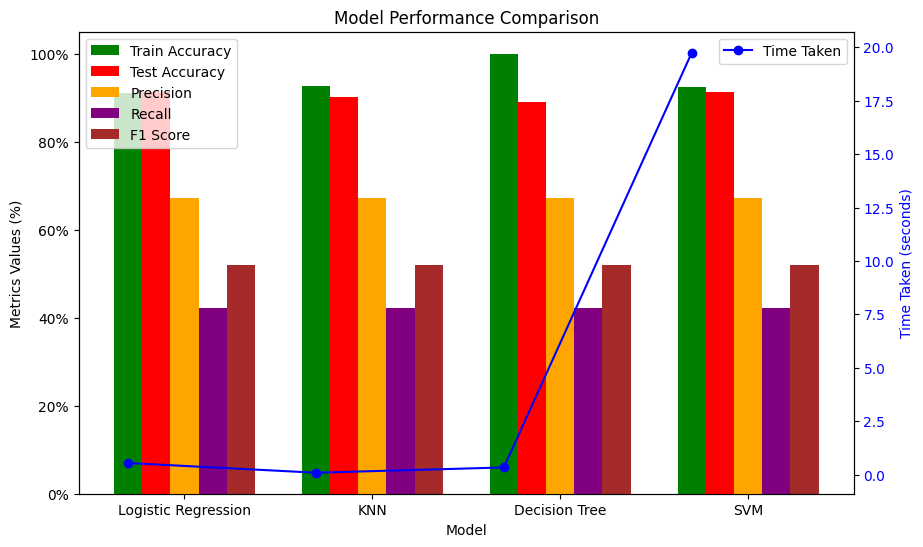

In [22]:

# Models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

results = {}
confusion_matrices = {}
for name, model in models.items():
    # Pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    # Time the training process
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    # Calculate train and test accuracy
    train_accuracy = pipeline.score(X_train, y_train)
    test_accuracy = pipeline.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    # Store the results
    results[name] = {
        'Time Taken': training_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)
# Create a plot
fig, ax1 = plt.subplots(figsize=(10, 6))
# Set bar width and positions
bar_width = 0.15
x = np.arange(len(models))
# Plot each metric as separate bars
metrics = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['green', 'red', 'orange', 'purple', 'brown']
for i, metric in enumerate(metrics):
    ax1.bar(x + i * bar_width, results_df[metric] * 100, width=bar_width, label=metric, color=colors[i], zorder=5)
# Plot time taken as a line on the secondary axis
ax2 = ax1.twinx()
ax2.plot(results_df.index, results_df['Time Taken'], marker='o', linestyle='-', color='blue', label='Time Taken', zorder=10)
ax2.set_ylabel('Time Taken (seconds)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
# Set labels and title
ax1.set_xlabel('Model')
ax1.set_ylabel('Metrics Values (%)')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))
ax1.tick_params(axis='y', labelcolor='black')
# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Model Performance Comparison')
plt.xticks(x + 2 * bar_width, results_df.index)
plt.show()


### Analysis Summary
   1. SVM takes the longest time compared to the other 3 models
   2. KNN took the shortest time to complete
   3. Accuracies are fairly similar with Logistic Regression and SVM scoring marginally better on the test accuracy
   4. All the models except decision tree performed better than the baseline model which had a accuracy of 89%

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time=   0.5s
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time=   0.6s
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time=   0.5s
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time=   0.6s
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time=   0.4s
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time=   0.2s
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time=   0.1s
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time=   0.2s
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time=   0.1s
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time=   0.1s
[CV] END ............classifier__C=1, classifier__penalty=l1; total time=   2.9s
[CV] END ............classifier__C=1, classifier_

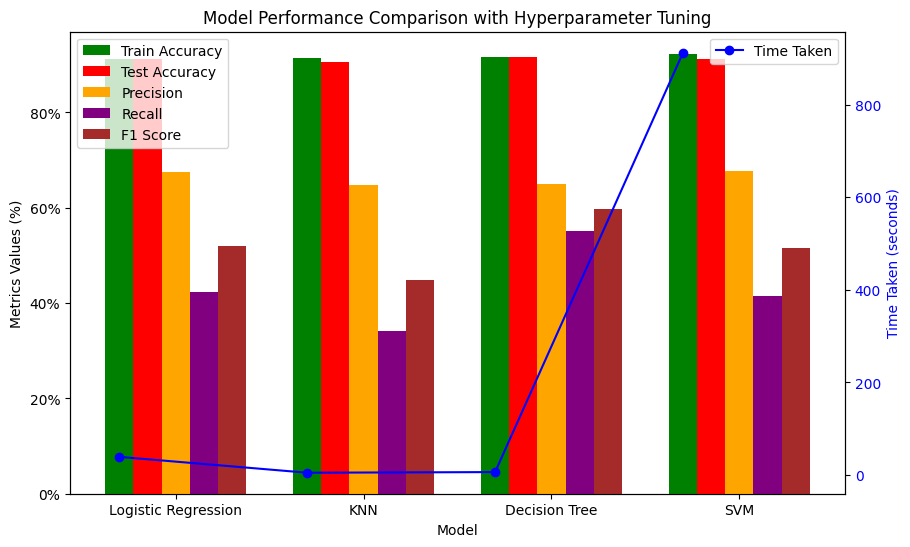

In [23]:
hp_models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, solver='liblinear'),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l1', 'l2']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 10]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf']
        }
    }
}

results = {}

for name, config in hp_models.items():
    # Pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', config['model'])])

    # Hyperparameter tuning using GridSearchCV, verbose to check if the program got killed or working in the background :-)
    grid_search = GridSearchCV(pipeline, config['params'], cv=5, verbose=2)
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Predict on test set using best parameters
    y_pred = grid_search.predict(X_test)

    # Calculate metrics
    train_accuracy = grid_search.score(X_train, y_train)
    test_accuracy = grid_search.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    # Store the results
    results[name] = {
        'Time Taken': training_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Best Parameters': grid_search.best_params_
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Create a plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set bar width and positions
bar_width = 0.15
x = np.arange(len(models))

# Plot each metric as separate bars
metrics = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['green', 'red', 'orange', 'purple', 'brown']
for i, metric in enumerate(metrics):
    ax1.bar(x + i * bar_width, results_df[metric] * 100, width=bar_width, label=metric, color=colors[i], zorder=5)

# Plot time taken as a line on the secondary axis
ax2 = ax1.twinx()
ax2.plot(results_df.index, results_df['Time Taken'], marker='o', linestyle='-', color='blue', label='Time Taken', zorder=10)
ax2.set_ylabel('Time Taken (seconds)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set labels and title
ax1.set_xlabel('Model')
ax1.set_ylabel('Metrics Values (%)')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))
ax1.tick_params(axis='y', labelcolor='black')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Model Performance Comparison with Hyperparameter Tuning')
plt.xticks(x + 2 * bar_width, results_df.index)
plt.show()


#### Summary: Post Hyperparameter Tuning
Based on the provided metrics, here's a summary of the models and their performance:

##### Time Taken:
    KNN: Fastest with 4.93 seconds.
    Decision Tree: Second fastest with 6.31 seconds.
    Logistic Regression: Takes 39.20 seconds.
    SVM: Slowest with 912.65 seconds.

##### Train Accuracy:
    SVM: Highest with 0.9233.
    Decision Tree: Second highest with 0.9174.
    KNN: 0.9152.
    Logistic Regression: Lowest with 0.9117.

##### Test Accuracy:
    SVM: Highest with 0.9120.
    Logistic Regression: 0.9123 (slightly higher than SVM).
    Decision Tree: 0.9162 (highest among all models).
    KNN: Lowest with 0.9052.

##### Precision:
    SVM: Highest with 0.6772.
    Logistic Regression: 0.6747.
    Decision Tree: 0.6505.
    KNN: Lowest with 0.6480.

##### Recall:
    Decision Tree: Highest with 0.5508.
    SVM: 0.4154.
    Logistic Regression: 0.4240.
    KNN: Lowest with 0.3419.

##### F1 Score:
    Decision Tree: Highest with 0.5965.
    Logistic Regression: 0.5208.
    SVM: 0.5149.
    KNN: Lowest with 0.4477.

#### Best Model
Based on multiple parameters, Decision Tree appears to be the best model overall:
    Test Accuracy: Highest among all models (0.9162).
    Recall: Highest among all models (0.5508).
    F1 Score: Highest among all models (0.5965).
    Time Taken: Reasonably fast with 6.31 seconds.
However, if speed is a critical factor, KNN might be considered due to its fast training time, though it performs slightly inferior on other metrics.
If you prioritize marginal accuracy and precision over speed, SVM could be an option, but its extremely long training time might be a significant drawback.

##### Questions